# Lab Assignment Five: Wide and Deep Network Architectures

### Authors
- Juliana Antonio
- Xiaona Hang
- Chuanqi Deng


### 1. Preparation
#### 1.1 Pre-processing

In [69]:
import pandas as pd
import numpy as np
from copy import deepcopy
from sklearn import metrics as mt
from sklearn.model_selection import train_test_split


df_ad_extra = pd.read_csv('data/Ad_table (extra).csv')
# shuffle the data
df_ad_extra = df_ad_extra.sample(frac=1).reset_index(drop=True)

df_ad_extra.info()

df_ad_extra.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268255 entries, 0 to 268254
Data columns (total 24 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Maker         268255 non-null  object 
 1    Genmodel     268255 non-null  object 
 2    Genmodel_ID  268255 non-null  object 
 3   Adv_ID        268255 non-null  object 
 4   Adv_year      268255 non-null  int64  
 5   Adv_month     268255 non-null  int64  
 6   Color         246380 non-null  object 
 7   Reg_year      268248 non-null  float64
 8   Bodytype      267301 non-null  object 
 9   Runned_Miles  267200 non-null  object 
 10  Engin_size    266191 non-null  object 
 11  Gearbox       268088 non-null  object 
 12  Fuel_type     267846 non-null  object 
 13  Price         267110 non-null  float64
 14  Engine_power  236444 non-null  float64
 15  Annual_Tax    221580 non-null  object 
 16  Wheelbase     240257 non-null  float64
 17  Height        240454 non-null  float64
 18  Widt

,Maker,Genmodel,Genmodel_ID,Adv_ID,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,...,Engine_power,Annual_Tax,Wheelbase,Height,Width,Length,Average_mpg,Top_speed,Seat_num,Door_num
0,Audi,A4,7_5,7_5$$459,2018,8,Silver,2012.0,Saloon,61894,...,141.0,120,2808.0,1427.0,2040.0,4701.0,58.9 mpg,130 mph,5.0,4.0
1,MINI,Clubman,54_1,54_1$$139,2018,4,Brown,2008.0,Estate,65000,...,120.0,140,2547.0,1426.0,1683.0,3937.0,51.4 mpg,125 mph,4.0,4.0
2,Ford,EcoSport,29_4,29_4$$718,2021,6,Silver,2019.0,SUV,1997,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0
3,SKODA,Rapid,80_6,80_6$$115,2018,6,Blue,2017.0,Hatchback,11349,...,123.0,140*,2602.0,1461.0,1940.0,4483.0,57.6 mpg,129 mph,5.0,5.0
4,Subaru,XV,86_11,86_11$$111,2018,6,Grey,2018.0,SUV,8,...,154.0,NaN,2665.0,1615.0,1800.0,4465.0,40.9 mpg,120 mph,5.0,5.0


In [70]:
data=deepcopy(df_ad_extra)
data.columns = data.columns.str.replace(' ', '')
# Remove columns that are not needed for the model
data.drop(['Genmodel_ID', 'Adv_ID', 'Annual_Tax'], axis=1, inplace=True)

# Convert Columns numeric data
data['Average_mpg'] = data['Average_mpg'].str.extract(r'(\d+\.\d+)').astype(float)
data['Top_speed'] = data['Top_speed'].str.extract(r'(\d+)').astype(float)
data['Engin_size'] = data['Engin_size'].str.extract(r'(\d+\.\d+)').astype(float)
data['Runned_Miles'] = pd.to_numeric(data['Runned_Miles'], errors='coerce')

# Fill categorical columns with the most frequent value (mode)
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(
    data[categorical_cols].mode().iloc[0])

# Get the unique values in each categorical column
for col in categorical_cols:
    print(
        f'{col} has {len(data[col].unique())} unique values')
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

data.to_csv('data/Ad_table (extra) preprocessed.csv')

# Get numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].to_numpy().astype(float)

print("=====================================================")
print(f'Numerical columns: {numerical_cols}')
print(f'Categorical columns: {categorical_cols}')

Maker has 88 unique values
Genmodel has 896 unique values
Color has 22 unique values
Bodytype has 18 unique values
Gearbox has 3 unique values
Fuel_type has 13 unique values
Numerical columns: Index(['Adv_year', 'Adv_month', 'Reg_year', 'Runned_Miles', 'Engin_size',
       'Price', 'Engine_power', 'Wheelbase', 'Height', 'Width', 'Length',
       'Average_mpg', 'Top_speed', 'Seat_num', 'Door_num'],
      dtype='object')
Categorical columns: Index(['Maker', 'Genmodel', 'Color', 'Bodytype', 'Gearbox', 'Fuel_type'], dtype='object')


In [71]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216069 entries, 0 to 216068
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Maker         216069 non-null  object 
 1   Genmodel      216069 non-null  object 
 2   Adv_year      216069 non-null  float64
 3   Adv_month     216069 non-null  float64
 4   Color         216069 non-null  object 
 5   Reg_year      216069 non-null  float64
 6   Bodytype      216069 non-null  object 
 7   Runned_Miles  216069 non-null  float64
 8   Engin_size    216069 non-null  float64
 9   Gearbox       216069 non-null  object 
 10  Fuel_type     216069 non-null  object 
 11  Price         216069 non-null  float64
 12  Engine_power  216069 non-null  float64
 13  Wheelbase     216069 non-null  float64
 14  Height        216069 non-null  float64
 15  Width         216069 non-null  float64
 16  Length        216069 non-null  float64
 17  Average_mpg   216069 non-null  float64
 18  Top_

,Maker,Genmodel,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,Engin_size,Gearbox,...,Price,Engine_power,Wheelbase,Height,Width,Length,Average_mpg,Top_speed,Seat_num,Door_num
0,Audi,A4,2018.0,8.0,Silver,2012.0,Saloon,61894.0,2.0,Automatic,...,8747.0,141.0,2808.0,1427.0,2040.0,4701.0,58.9,130.0,5.0,4.0
1,MINI,Clubman,2018.0,4.0,Brown,2008.0,Estate,65000.0,1.6,Manual,...,4999.0,120.0,2547.0,1426.0,1683.0,3937.0,51.4,125.0,4.0,4.0
2,SKODA,Rapid,2018.0,6.0,Blue,2017.0,Hatchback,11349.0,1.4,Automatic,...,10690.0,123.0,2602.0,1461.0,1940.0,4483.0,57.6,129.0,5.0,5.0
3,Subaru,XV,2018.0,6.0,Grey,2018.0,SUV,8.0,2.0,Automatic,...,28123.0,154.0,2665.0,1615.0,1800.0,4465.0,40.9,120.0,5.0,5.0
4,Citroen,Grand C4 Picasso,2018.0,6.0,Silver,2008.0,MPV,65000.0,1.6,Automatic,...,3795.0,110.0,2728.0,1710.0,1830.0,4590.0,55.4,112.0,7.0,5.0


#### <center> Data Descriptions </center>
    
|Feature | Data Type | Description  |
|-------|---------------|----------|
|Maker:| categorical | Automaker name |
|Genmodel:| categorical| Generic Model name|
|Adv_year:| discrete| Advertisement’s creation year|
|Adv_month:| 0-12 months, discrete |Advertisement’s creation month|
|color: | categorical| The color of the car|
|Reg_year: | discrete | This car’s first registration/selling year|
|Bodytype: | categorical| This car’s body type|
|Runned_miles: | continous | This car’s runned mileage|
|Engin_size: | continous | This car’s engine size|
|Gearbox: | Categorical | This car’s gearbox |
|Fuel_type: | categorical | This car’s fuel type |
|**Price**: | continous | This car’s selling price| 
|Engine_power: | continous | This car's enging power|
|Wheelbase: | continous | Horizontal distance between the centers of the front and rear wheels|
|Height: | continous | Height of the car|
|Width:  | continous | Width of the car|
|Length: | continous | Length of the car|
|Avg_mpg: | continous | Average miles per gallon |
|Top_speed: | continous | Highest speed car can reach |
|Seat_num: | discrete | This car’s seats number|
|Door_num: | discrete | This car's doors number|



----

##### Exploring Categorical Data

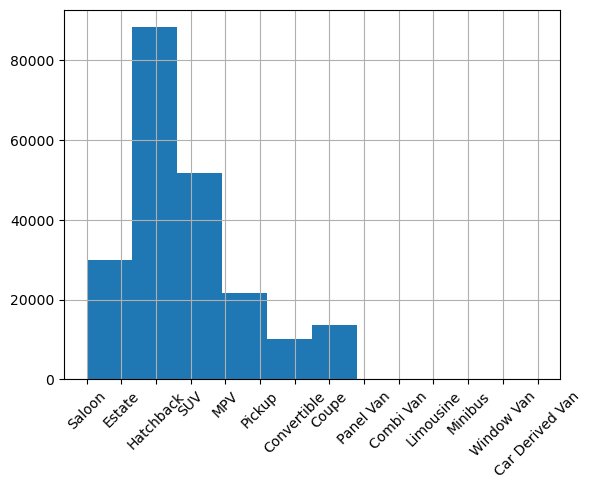

In [72]:
import matplotlib.pyplot as plt
data['Bodytype'].hist()
ax = plt.gca()
plt.xticks(rotation=45)
plt.show()

Plotting the 'Bodytype' category, we see in this histogram that the Hatchback has the highest amount of instances, followed by the SUV and MPV. 

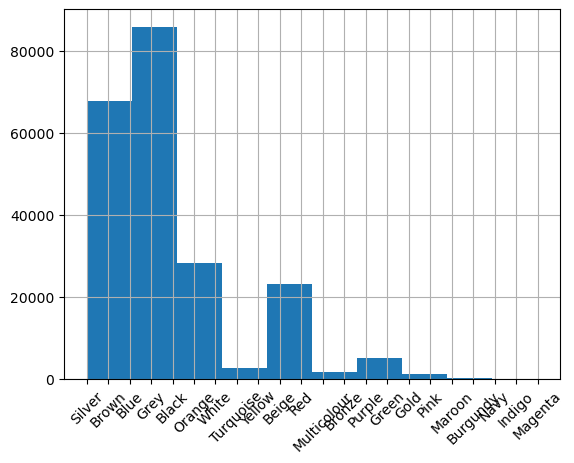

In [73]:
import matplotlib.pyplot as plt
data['Color'].hist()
ax = plt.gca()
plt.xticks(rotation=45)
plt.show()

Plotting the category 'Color', we can see the most common color of car(s) is Blue, Silver, and Grey, followed by Black and White. 

In [74]:
from sklearn.preprocessing import StandardScaler
import numpy as np

cat_features = ['Maker', 'Genmodel', 'Color', 'Bodytype', 'Fuel_type', 'Gearbox']

# Scale continuous numeric values
num_features = ['Runned_Miles', 'Engin_size', 'Engine_power', 'Wheelbase', 'Height', 'Width', 'Length', 'Average_mpg', 'Top_speed']

for col in num_features:
    data[col] = data[col].astype(float)
    ss = StandardScaler()
    data[col] = ss.fit_transform(data[col].values.reshape(-1, 1))

# convert price to 3 category, 0: low, 1: medium, 2: high
data['Price'] = pd.qcut(data['Price'], 3, labels=range(3))
data.head()

,Maker,Genmodel,Adv_year,Adv_month,Color,Reg_year,Bodytype,Runned_Miles,Engin_size,Gearbox,...,Price,Engine_power,Wheelbase,Height,Width,Length,Average_mpg,Top_speed,Seat_num,Door_num
0,Audi,A4,2018.0,8.0,Silver,2012.0,Saloon,0.264944,0.139912,Automatic,...,1,-0.111213,0.518439,-0.721259,0.950694,0.827863,0.587848,0.429311,5.0,4.0
1,MINI,Clubman,2018.0,4.0,Brown,2008.0,Estate,0.337869,-0.394857,Manual,...,0,-0.357331,-0.055079,-0.728025,-1.391998,-1.007168,0.038644,0.157120,4.0,4.0
2,SKODA,Rapid,2018.0,6.0,Blue,2017.0,Hatchback,-0.921791,-0.662241,Automatic,...,1,-0.322171,0.065777,-0.491213,0.294478,0.304254,0.492652,0.374873,5.0,5.0
3,Subaru,XV,2018.0,6.0,Grey,2018.0,SUV,-1.188064,0.139912,Automatic,...,2,0.041145,0.204213,0.550758,-0.624225,0.261021,-0.730240,-0.115070,5.0,5.0
4,Citroen,Grand C4 Picasso,2018.0,6.0,Silver,2008.0,MPV,0.337869,-0.394857,Automatic,...,0,-0.474530,0.342648,1.193533,-0.427360,0.561255,0.331553,-0.550574,7.0,5.0


The final dataset used for classification consists of data sourced from the publicly available dataset on Kaggle (https://www.kaggle.com/datasets/mexwell/dvm-car/data), aimed at facilitating business-related research and applications in the automotive industry. Specifically, the dataset includes information pertinent to car appearance design, consumer analytics, and sales modeling. We utilized the "Ad_table (extra).csv" file, which provides additional features to enrich the dataset for the purpose of training wide and deep neural networks.

The dataset comprises 21 features, categorized into three types: 6 categorical, 10 continuous, and 5 discrete variables as shown in the Data Description Table. To prepare the data for modeling, the continuous numeric values have been scaled using StandardScaler from sklearn.preprocessing. The features 'Runned_Miles', 'Engin_size', 'Engine_power', 'Wheelbase', 'Height', 'Width', 'Length', 'Average_mpg', and 'Top_speed' have been scaled to have a mean of 0 and a standard deviation of 1.

To facilitate classification tasks, the target variable 'Price' has been preprocessed and converted into categorical data. It now consists of three categories:

0 representing low price,
1 representing medium price, and
2 representing high price.

The dataset contains a total of 216,069 instances after preprocessing, where 52186 instances (NaNs) were removed, providing a rich and diverse set of data points for training and evaluating classification models.

#### 1.2 Cross-Product

Crossing features such as 'Maker' and 'Bodytype' can uncover relationships between vehicle manufacturers and the body styles of their offerings, providing insights into pricing dynamics influenced by brand reputation and aesthetic preferences. This analysis is invaluable for automotive marketers seeking to understand consumer preferences and tailor marketing strategies accordingly.

Similarly, crossing 'Gearbox' with 'Fuel_type' can reveal interactions between transmission types and fuel preferences, reflecting performance characteristics and market segmentation. Understanding these interactions is crucial for automakers aiming to optimize product offerings and capitalize on market trends effectively.

Lastly, crossing 'Color' and 'Bodytype' offers valuable insights into consumer preferences for vehicle aesthetics and practical functionality. It unveils how certain colors resonate differently with distinct body types, indicative of evolving trends in styling preferences and regional nuances. This analysis aids automotive manufacturers in aligning their color offerings with market demands and tailoring design strategies to cater to diverse consumer preferences effectively.

However, crossing features with high amount of instances, such as 'Genmodel' with 698 unique instances, may introduce computational complexity and increase the risk of overfitting. Therefore, prioritizing cross-product combinations based on their relevance to the domain and balancing computational constraints is essential for effectively capturing interactions while mitigating the potential drawbacks of model complexity.

In [75]:
# Fill categorical columns with the most frequent value (mode)
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(
    data[categorical_cols].mode().iloc[0])

# Get the unique values in each categorical column
for col in categorical_cols:
    print(
        f'{col} has {len(data[col].unique())} unique values')
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)


Maker has 60 unique values
Genmodel has 698 unique values
Color has 22 unique values
Bodytype has 14 unique values
Gearbox has 2 unique values
Fuel_type has 8 unique values


#### 1.3 Metric(s) to use to evaluate algorithm’s performance

For evaluating the algorithm's performance, we will primarily rely on the F1 score, which balances both precision and recall. In the context of classification tasks like predicting price categories (low, medium, high), F1 score is particularly suitable as it considers both false positives and false negatives. This is crucial in the automotive industry dataset, as misclassifying a vehicle's price could lead to significant financial implications for both buyers and sellers. By optimizing for F1 score, we ensure a balance between correctly identifying high-priced vehicles (minimizing missed opportunities) and avoiding misclassification errors (minimizing false alarms), thus enhancing the overall effectiveness and reliability of the model's predictions.

#### 1.4 Dividing Training and Testing Set

We will use shuffle splits to divide the data into training and testing sets for regression, as it ensures random sampling without requiring stratification. This method is appropriate for regression tasks because it provides unbiased estimates of model performance by repeatedly shuffling and splitting the data. It mirrors real-world scenarios where models need to generalize well to unseen data, making it a practical choice for evaluating model performance.

In [76]:
from sklearn.model_selection import ShuffleSplit
from keras.utils import to_categorical

num_classes = 3
y = data['Price']
X = data.drop(columns=['Price'])  

n_splits = 5
# Initialize shuffle splitter
shuffle_splitter = ShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=42)

# Iterate over shuffle splits
for fold, (train_index, test_index) in enumerate(shuffle_splitter.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    print(f"Fold {fold+1} - Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")

Fold 1 - Train Shape: (172855, 20), Test Shape: (43214, 20)
Fold 2 - Train Shape: (172855, 20), Test Shape: (43214, 20)
Fold 3 - Train Shape: (172855, 20), Test Shape: (43214, 20)
Fold 4 - Train Shape: (172855, 20), Test Shape: (43214, 20)
Fold 5 - Train Shape: (172855, 20), Test Shape: (43214, 20)


In [25]:
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.layers import Embedding, Concatenate, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [77]:

import sys

try:
    from sklearn import metrics as mt
    import tensorflow as tf
    from tensorflow import keras

    # Print the versions of TensorFlow, Keras, and Python
    print(f'TensorFlow version: {tf.__version__}')
    # print(f'Keras version: {keras.__version__}')
    print(f'Python version: {sys.version}')

except ImportError as e:
    print(f'Error importing libraries: {e}')
    print('Make sure you have the necessary packages installed (tensorflow, sklearn, etc.)')

except Exception as e:
    print(f'An error occurred: {e}')

TensorFlow version: 2.16.1
Python version: 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]


In [87]:
# Create a tensorflow dataset, for ease of use later
df_train, df_test = train_test_split(data, test_size=0.2)
batch_size = 2048

def create_dataset_from_dataframe(df_input):
    
    labels = df_input['Price']
    df = df_input.copy().drop(columns=['Price'])  

    df = {key: value.values[:, np.newaxis] for key, value in df.items()}
    
    # create a tf.data.Dataset object
    ds = tf.data.Dataset.from_tensor_slices((dict(df), to_categorical(labels)))
    #ds = tf.data.Dataset.from_tensor_slices((dict(df), (labels)))
 
    # enable batching and prefetching
    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)

    return ds

ds_train = create_dataset_from_dataframe(df_train)
ds_test = create_dataset_from_dataframe(df_test)

In [88]:

# FeatureSpace to make data discrete and normalization


from keras.utils import FeatureSpace

# lump everything together, and concatenate
feature_space = FeatureSpace(
    features={
        # Categorical feature encoded as string
        "Maker": FeatureSpace.string_categorical(num_oov_indices=16),
        "Genmodel": FeatureSpace.string_categorical(num_oov_indices=32),
        "Color": FeatureSpace.string_categorical(num_oov_indices=0),
        "Bodytype": FeatureSpace.string_categorical(num_oov_indices=0),
        "Gearbox": FeatureSpace.string_categorical(num_oov_indices=0),
        "Fuel_type": FeatureSpace.string_categorical(num_oov_indices=0),
        
        # Numerical features to make discrete, make into integer with max val
        "Adv_year": FeatureSpace.float_discretized(num_bins=10),
        "Adv_month": FeatureSpace.float_discretized(num_bins=12),
        "Reg_year": FeatureSpace.float_discretized(num_bins=10),
        "Seat_num": FeatureSpace.float_discretized(num_bins=10),
        "Door_num": FeatureSpace.float_discretized(num_bins=10),
        
        # Numerical features to normalize (normalization will be learned)
        # learns the mean, variance, and if to invert (3 parameters)
        "Runned_Miles": FeatureSpace.float_normalized(),
        "Engin_size": FeatureSpace.float_normalized(),
        "Engine_power": FeatureSpace.float_normalized(),
        "Wheelbase": FeatureSpace.float_normalized(),
        "Height": FeatureSpace.float_normalized(),
        "Width": FeatureSpace.float_normalized(),
        "Length": FeatureSpace.float_normalized(),
        "Average_mpg": FeatureSpace.float_normalized(),
        "Top_speed": FeatureSpace.float_normalized(),
    },
# Specify feature cross with a custom crossing dim
    crosses=[
        FeatureSpace.cross(feature_names=('Maker', 'Bodytype'), crossing_dim= 60 * 14),
        FeatureSpace.cross(feature_names=('Fuel_type', 'Gearbox'), crossing_dim= 2 * 8),
        FeatureSpace.cross(feature_names=('Color', 'Bodytype'), crossing_dim= 22 * 14),
    ],
    output_mode="concat", # can also be a dict, processed internally
)


# Run on the data
# create a version of the dataset that can be iterated without labels
train_ds_with_no_labels = ds_train.map(lambda x, _: x)  
# the adapt function allows the model to learn one-hot encoding sizes
feature_space.adapt(train_ds_with_no_labels) # inititalize the feature map to this data


# now define a preprocessing operation that returns the processed features
preprocessed_ds_train = ds_train.map(lambda x, y: (feature_space(x), y), 
                                     num_parallel_calls=tf.data.AUTOTUNE)
# run it so that we can use the pre-processed data
preprocessed_ds_train = preprocessed_ds_train.prefetch(tf.data.AUTOTUNE)

# Run on the test set
preprocessed_ds_test = ds_test.map(lambda x, y: (feature_space(x), y), num_parallel_calls=tf.data.AUTOTUNE)
preprocessed_ds_test = preprocessed_ds_test.prefetch(tf.data.AUTOTUNE)

In [13]:
# # Embedding for each categorical column
# from tensorflow.keras.layers import Embedding, Flatten


# def setup_embedding_from_categorical(feature_space, col_name):
#     N = len(feature_space.preprocessors[col_name].get_vocabulary())
#     x = feature_space.preprocessors[col_name].output

#     # now use an embedding to deal with integers from feature space
#     x = Embedding(input_dim=N,
#                   output_dim=int(np.sqrt(N)),
#                   input_length=1, name=col_name+'_embed')(x)

#     x = Flatten()(x)  # get rid of that extra dimension (for time of embedding)

#     return x  # return the tensor here

In [14]:
# # Embedding for the cross columns

# def setup_embedding_from_crossing(feature_space, col_name):
#     N = feature_space.crossers[col_name].num_bins
#     x = feature_space.crossers[col_name].output

#     # now use an embedding to deal with integers as if they were one hot encoded
#     x = Embedding(input_dim=N,
#                   output_dim=int(np.sqrt(N)),
#                   input_length=1, name=col_name+'_embed')(x)

#     x = Flatten()(x)  # get rid of that extra dimension (for time of embedding)

#     return x



### 2 Modeling
#### 2.1 Wide and Deep Networks

In [89]:
from keras.layers import  Dense, Concatenate
from keras.models import Model

encoded_features = feature_space.get_encoded_features() # these features have been encoded

def get_model(wide_branch_units, deep_branch_layers):
    """return a model based on wide_branch_units and deep_branch_layers."""
    wide_branch = Dense(units=wide_branch_units, activation='relu', name='wide_branch')(encoded_features)
    
    deep_branch_strarting_units = 2 ** (deep_branch_layers+1) # last layer's units is 4
    deep_branch = Dense(units=deep_branch_strarting_units,activation='relu', name='deep_branch_0')(encoded_features)
    for i in range(deep_branch_layers - 1):
        deep_branch_strarting_units //= 2
        deep_branch = Dense(units=deep_branch_strarting_units,activation='relu', name=f'deep_branch_{(i+1)}')(deep_branch)
    final_branch = Concatenate(name='concat_deep_wide')([wide_branch, deep_branch])
    final_branch = Dense(num_classes, 'softmax')(final_branch)
    model = Model(inputs=encoded_features, outputs=final_branch)
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy", "F1Score"])
    return model

# get 3 different models
models = [get_model(8, 3),
          get_model(8, 5),
          get_model(64, 5)]

In [90]:
from IPython.display import clear_output

# train the models
num_epoch = 5
for model in models:
    clear_output(wait=True)
    model.fit(preprocessed_ds_train, validation_data=preprocessed_ds_test, epochs=num_epoch, verbose=1)

Epoch 1/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - F1Score: 0.6680 - accuracy: 0.6707 - loss: 0.7616 - val_F1Score: 0.9127 - val_accuracy: 0.9127 - val_loss: 0.2140
Epoch 2/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - F1Score: 0.9178 - accuracy: 0.9178 - loss: 0.1990 - val_F1Score: 0.9247 - val_accuracy: 0.9246 - val_loss: 0.1802
Epoch 3/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - F1Score: 0.9266 - accuracy: 0.9265 - loss: 0.1758 - val_F1Score: 0.9262 - val_accuracy: 0.9262 - val_loss: 0.1744
Epoch 4/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - F1Score: 0.9292 - accuracy: 0.9292 - loss: 0.1694 - val_F1Score: 0.9281 - val_accuracy: 0.9281 - val_loss: 0.1716
Epoch 5/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - F1Score: 0.9308 - accuracy: 0.9308 - loss: 0.1657 - val_F1Score: 0.9286 - val_accuracy: 0.9286 - val_loss: 0.1698


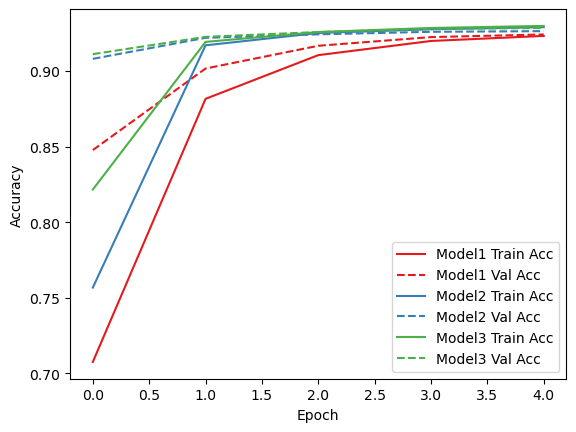

In [17]:
# plot the performance of the networks
import matplotlib.pyplot as plt
cm =  plt.get_cmap('Set1')
for i, model in enumerate(models):
    plt.plot(model.history.history['accuracy'], label = f"Model{i+1} Train Acc", color= cm(i))
    plt.plot(model.history.history['val_accuracy'], label = f"Model{i+1} Val Acc", color = cm(i), linestyle = '--')
    #'loss', 'val_loss', 'val_accuracy'

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend();

#### 2.2 Generalization Performance

In [18]:
# prepare cross validation datasets
def create_dataset_from_dataframe(df_input, labels):
    """Create tensorflow Dataset"""
    df = df_input.copy()
    df = {key: value.values[:, np.newaxis] for key, value in df.items()}
    
    # create a tf.data.Dataset object
    ds = tf.data.Dataset.from_tensor_slices((df, to_categorical(labels)))
 
    # enable batching and prefetching
    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)
    return ds


# create folds and data after applying feature_space
ds_cross_val = []
for fold, (train_index, test_index) in enumerate(shuffle_splitter.split(X, y)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    ds_train = create_dataset_from_dataframe(X_train, y_train)
    ds_test = create_dataset_from_dataframe(X_test, y_test)
    
    # now define a preprocessing operation that returns the processed features
    preprocessed_ds_train = ds_train.map(lambda x, y: (feature_space(x), y), 
                                        num_parallel_calls=tf.data.AUTOTUNE)
    # run it so that we can use the pre-processed data
    preprocessed_ds_train = preprocessed_ds_train.prefetch(tf.data.AUTOTUNE)

    # Run on the test set
    preprocessed_ds_test = ds_test.map(lambda x, y: (feature_space(x), y), num_parallel_calls=tf.data.AUTOTUNE)
    preprocessed_ds_test = preprocessed_ds_test.prefetch(tf.data.AUTOTUNE)
    
    ds_cross_val.append((preprocessed_ds_train, preprocessed_ds_test))

In [19]:
# train and evaluate models with different depth
from tqdm.notebook import tqdm
from concurrent.futures import ThreadPoolExecutor, as_completed

result = []
num_epoch = 5
wide_layer_units_list = [8, 64]
num_deep_layers = list(range(3, 10, 3))
progress = tqdm(total=(len(wide_layer_units_list) * len(num_deep_layers) * len(ds_cross_val)))
abort = False

def train_and_evaluate(preprocessed_ds_train, preprocessed_ds_test, model_i, wide_layer_units, num_deep_layer):
    """Create, train, and evaluate model"""
    if abort:
        return None
    model = get_model(wide_layer_units, num_deep_layer)
    model.fit(preprocessed_ds_train, epochs=num_epoch, verbose=0)
    if abort:
        return None
    ret = model.evaluate(preprocessed_ds_test, verbose=0)
    return [f"model_{model_i+1}({wide_layer_units})", num_deep_layer, *ret]

# train in parallel
tasks = []
with ThreadPoolExecutor(4) as tpx:
    for model_i, wide_layer_units in enumerate(wide_layer_units_list):
        for num_deep_layer in num_deep_layers:
            for preprocessed_ds_train, preprocessed_ds_test in ds_cross_val:
                tasks.append(tpx.submit(train_and_evaluate, preprocessed_ds_train, preprocessed_ds_test, model_i, wide_layer_units, num_deep_layer))
    try:
        for future in as_completed(tasks):
            result.append(future.result())
            progress.update()
    except:
        abort = True
        print("Aborting...")

  0%|          | 0/30 [00:00<?, ?it/s]

In [20]:
metrics_df = pd.DataFrame(result, columns=["Model(wide_units)", "Deep Branch Layers", "Loss", "Accuracy", "F1 Score" ])

# Split the 'F1 Score' column into three separate columns
metrics_df[['F1 Score 1', 'F1 Score 2', 'F1 Score 3']] = pd.DataFrame(metrics_df['F1 Score'].tolist(), index=metrics_df.index)

# Drop the original 'F1 Score' column
metrics_df.drop(columns=['F1 Score'], inplace=True)
print(metrics_df.head())

  Model(wide_units)  Deep Branch Layers      Loss  Accuracy  \
0        model_1(8)                   3  0.198151  0.922178   
1        model_1(8)                   3  0.185833  0.923937   
2        model_1(8)                   3  0.187549  0.923150   
3        model_1(8)                   3  0.184861  0.924214   
4        model_1(8)                   3  0.190390  0.921391   

                                       F1 Score 1  \
0   tf.Tensor(0.9372054, shape=(), dtype=float32)   
1   tf.Tensor(0.9371907, shape=(), dtype=float32)   
2  tf.Tensor(0.93979496, shape=(), dtype=float32)   
3  tf.Tensor(0.93996173, shape=(), dtype=float32)   
4  tf.Tensor(0.93785614, shape=(), dtype=float32)   

                                       F1 Score 2  \
0    tf.Tensor(0.886999, shape=(), dtype=float32)   
1   tf.Tensor(0.8871439, shape=(), dtype=float32)   
2  tf.Tensor(0.88368326, shape=(), dtype=float32)   
3  tf.Tensor(0.88756496, shape=(), dtype=float32)   
4   tf.Tensor(0.8840709, shape=(), dt

In [21]:
# display the evaluation results
from IPython.display import display
grouped_metrics_df_mean = metrics_df.groupby(['Model(wide_units)', "Deep Branch Layers"]).mean().reset_index()
grouped_metrics_df_median = metrics_df.groupby(['Model(wide_units)', "Deep Branch Layers"]).median().reset_index()
grouped_metrics_df_min = metrics_df.groupby(['Model(wide_units)', "Deep Branch Layers"]).min().reset_index()
grouped_metrics_df_max = metrics_df.groupby(['Model(wide_units)', "Deep Branch Layers"]).max().reset_index()

print("Mean 5-fold cross validation result")
display(grouped_metrics_df_mean)

print("Median 5-fold cross validation result")
display(grouped_metrics_df_median)

print("Min 5-fold cross validation result")
display(grouped_metrics_df_min)

print("Max 5-fold cross validation result")
display(grouped_metrics_df_max)

TypeError: agg function failed [how->median,dtype->object]

The above reuslt is averaged over 5-fold cross validation. Accoding to the result, deeper models have better performance on all the four metrics. From the mean and median results, the best model is model_2 with 9 layers in the deep branch. The metrics has demonstrated its superiority over other models.

#### 2.3 Compare a standard MLP to the Wide and Deep Network with best performance
- To prepare for building a standard Multi-Layer Perceptron (MLP) model, I will transform the features using FeatureSpace, ensuring no crossed features are involved, thus we will not using any wide branche.
- According to the results in section 2.2, the best model is model_2 with 9 layers. We will use the same parameters to construct a similar standard MLP with 9 layers.

In [78]:
df_train, df_test = train_test_split(data, test_size=0.2)
batch_size = 2048

def create_dataset_from_dataframe(df_input):

    labels = df_input['Price']
    df = df_input.copy().drop(columns=['Price'])

    df = {key: value.values[:, np.newaxis] for key, value in df.items()}

    # create a tf.data.Dataset object
    ds = tf.data.Dataset.from_tensor_slices((dict(df), to_categorical(labels)))
    # ds = tf.data.Dataset.from_tensor_slices((dict(df), (labels)))

    # enable batching and prefetching
    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)

    return ds
ds_train = create_dataset_from_dataframe(df_train)
ds_test = create_dataset_from_dataframe(df_test)

from keras.utils import FeatureSpace



# lump everything together, and concatenate

# lump everything together, and concatenate
feature_space = FeatureSpace(
    features={
        # Categorical feature encoded as string
        "Maker": FeatureSpace.string_categorical(num_oov_indices=16),
        "Genmodel": FeatureSpace.string_categorical(num_oov_indices=32),
        "Color": FeatureSpace.string_categorical(num_oov_indices=0),
        "Bodytype": FeatureSpace.string_categorical(num_oov_indices=0),
        "Gearbox": FeatureSpace.string_categorical(num_oov_indices=0),
        "Fuel_type": FeatureSpace.string_categorical(num_oov_indices=0),

        # Numerical features to make discrete, make into integer with max val
        "Adv_year": FeatureSpace.float_discretized(num_bins=10),
        "Adv_month": FeatureSpace.float_discretized(num_bins=12),
        "Reg_year": FeatureSpace.float_discretized(num_bins=10),
        "Seat_num": FeatureSpace.float_discretized(num_bins=10),
        "Door_num": FeatureSpace.float_discretized(num_bins=10),

        # Numerical features to normalize (normalization will be learned)
        # learns the mean, variance, and if to invert (3 parameters)
        "Runned_Miles": FeatureSpace.float_normalized(),
        "Engin_size": FeatureSpace.float_normalized(),
        "Engine_power": FeatureSpace.float_normalized(),
        "Wheelbase": FeatureSpace.float_normalized(),
        "Height": FeatureSpace.float_normalized(),
        "Width": FeatureSpace.float_normalized(),
        "Length": FeatureSpace.float_normalized(),
        "Average_mpg": FeatureSpace.float_normalized(),
        "Top_speed": FeatureSpace.float_normalized(),
    },

    output_mode="concat",  # can also be a dict, processed internally
)

train_ds_with_no_labels = ds_train.map(lambda x, _: x)

feature_space.adapt(train_ds_with_no_labels)

preprocessed_ds_train = ds_train.map(lambda x, y: (feature_space(x), y),
                                     num_parallel_calls=tf.data.AUTOTUNE)
preprocessed_ds_train = preprocessed_ds_train.prefetch(tf.data.AUTOTUNE)

preprocessed_ds_test = ds_test.map(lambda x, y: (
    feature_space(x), y), num_parallel_calls=tf.data.AUTOTUNE)
preprocessed_ds_test = preprocessed_ds_test.prefetch(tf.data.AUTOTUNE)

In [79]:
from tensorflow import keras
from tensorflow.keras import layers

# Use same parameters as the best model
num_classes = 3
num_epoch = 5
verbose = 1

dict_inputs = feature_space.get_inputs()
encoded_features = feature_space.get_encoded_features()
x = keras.layers.Dense(1024, activation="relu")(encoded_features)
x = keras.layers.Dense(512, activation="relu")(x)
x = keras.layers.Dense(256, activation="relu")(x)
x = keras.layers.Dense(128, activation="relu")(x)
x = keras.layers.Dense(64, activation="relu")(x)
x = keras.layers.Dense(32, activation="relu")(x)
x = keras.layers.Dense(8, activation="relu")(x)
x = keras.layers.Dense(4, activation="relu")(x)
output = keras.layers.Dense(num_classes, activation="softmax")(x)

standard_model = keras.Model(inputs=encoded_features, outputs=output)
standard_model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy", "F1Score"]
)
standard_model.summary()
# plot_model(standard_model)

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ keras_tensor_509CLONE           │ (None, 906)            │             0 │
│ (InputLayer)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1024)           │       928,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 3)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,628,443 (6.21 MB)

 Trainable params: 1,628,443 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

In [80]:
# train using the processed features 

history_standard = standard_model.fit(
    preprocessed_ds_train, epochs=num_epoch, validation_data=preprocessed_ds_test, verbose=verbose
)

Epoch 1/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 14s 106ms/step - F1Score: 0.5504 - accuracy: 0.6003 - loss: 0.6762 - val_F1Score: 0.9204 - val_accuracy: 0.9203 - val_loss: 0.1958
Epoch 2/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - F1Score: 0.9227 - accuracy: 0.9225 - loss: 0.1856 - val_F1Score: 0.9248 - val_accuracy: 0.9250 - val_loss: 0.1791
Epoch 3/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - F1Score: 0.9296 - accuracy: 0.9294 - loss: 0.1701 - val_F1Score: 0.9247 - val_accuracy: 0.9250 - val_loss: 0.1810
Epoch 4/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step - F1Score: 0.9330 - accuracy: 0.9328 - loss: 0.1625 - val_F1Score: 0.9242 - val_accuracy: 0.9244 - val_loss: 0.1823
Epoch 5/5
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - F1Score: 0.9360 - accuracy: 0.9359 - loss: 0.1559 - val_F1Score: 0.9234 - val_accuracy: 0.9236 - val_loss: 0.1865


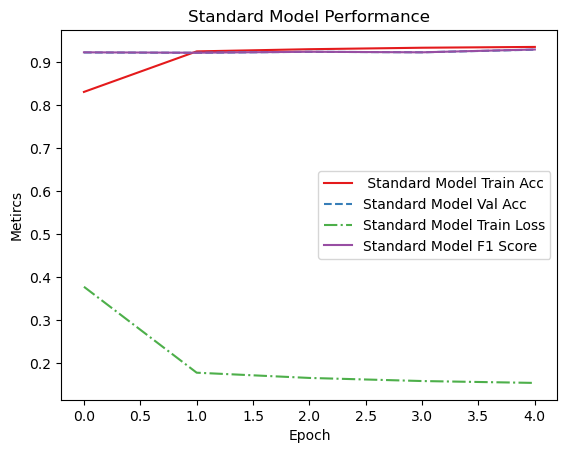

In [49]:
import matplotlib.pyplot as plt
cm = plt.get_cmap('Set1')
plt.plot(history_standard.history['accuracy'],
         label=" Standard Model Train Acc", color=cm(0))
plt.plot(history_standard.history['val_accuracy'],
         label="Standard Model Val Acc", color=cm(1), linestyle='--')
plt.plot(history_standard.history['loss'], label="Standard Model Train Loss", color=cm(2), linestyle='-.')
# plt.plot(history_standard.history['val_F1Score'], label="Standard Model Val F1 Score", color=cm(3), linestyle=':')
if 'val_F1Score' in history_standard.history:
    f1_score = np.array(history_standard.history['val_F1Score'])
    f1_mean_standard_model = np.mean(f1_score, axis=1) if f1_score.ndim > 1 else f1_score
    plt.plot(f1_mean_standard_model,label="Standard Model F1 Score", color=cm(3))

plt.xlabel('Epoch')
plt.ylabel('Metircs')
plt.title('Standard Model Performance')
plt.legend()

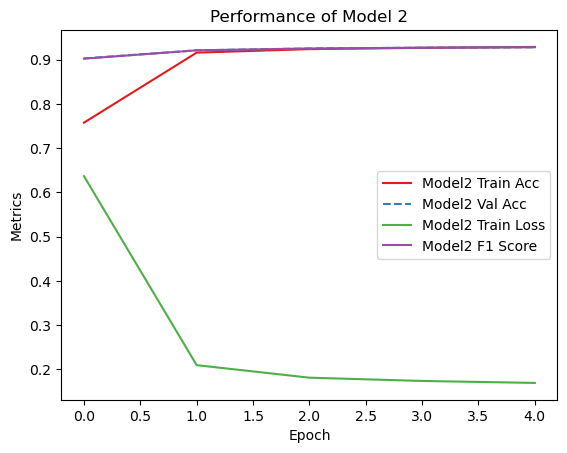

In [56]:
# plot the performanc to compare the standard model and model_2

cm = plt.get_cmap('Set1')
# Loop through models and specifically plot for the second model
for i, model in enumerate(models):
    if i == 1:  # Index 1 corresponds to the second model
        plt.plot(model.history.history['accuracy'],
                 label=f"Model{i+1} Train Acc", color=cm(0))
        model2_accuracy = model.history.history['val_accuracy']
        plt.plot(model.history.history['val_accuracy'],
                 label=f"Model{i+1} Val Acc", color=cm(1), linestyle='--')
        plt.plot(model.history.history['loss'],
                 label=f"Model{i+1} Train Loss", color=cm(2))
        model2_loss = model.history.history['val_loss']
        if 'val_F1Score' in model.history.history:
            f1_score = np.array(model.history.history['val_F1Score'])
            model2_f1_mean = np.mean(
                f1_score, axis=1) if f1_score.ndim > 1 else f1_score
            plt.plot(model2_f1_mean, label=f"Model{i+1} F1 Score", color=cm(3))

plt.xlabel('Epoch')
plt.ylabel('Metrics')
plt.title('Performance of Model 2')
plt.legend()
plt.show() 

In [58]:

import warnings
import pandas as pd

metrics_list_MLP = ['Standard Model', history_standard.history['accuracy']
                    [-1], np.mean(f1_mean_standard_model), history_standard.history['loss'][-1]]
metrics_list_model2 = ['Model 2', model2_accuracy[-1],
                       np.mean(model2_f1_mean), model2_loss[-1]]

metrics_list = [metrics_list_MLP, metrics_list_model2]
metrics_df = pd.DataFrame(metrics_list, columns=['Model', 'Accuracy', 'F1 Score', 'Loss'])
metrics_df.set_index('Model', inplace=True)
print(metrics_df)

                Accuracy  F1 Score      Loss
Model                                       
Standard Model  0.936143  0.924973  0.154425
Model 2         0.928357  0.921022  0.172724


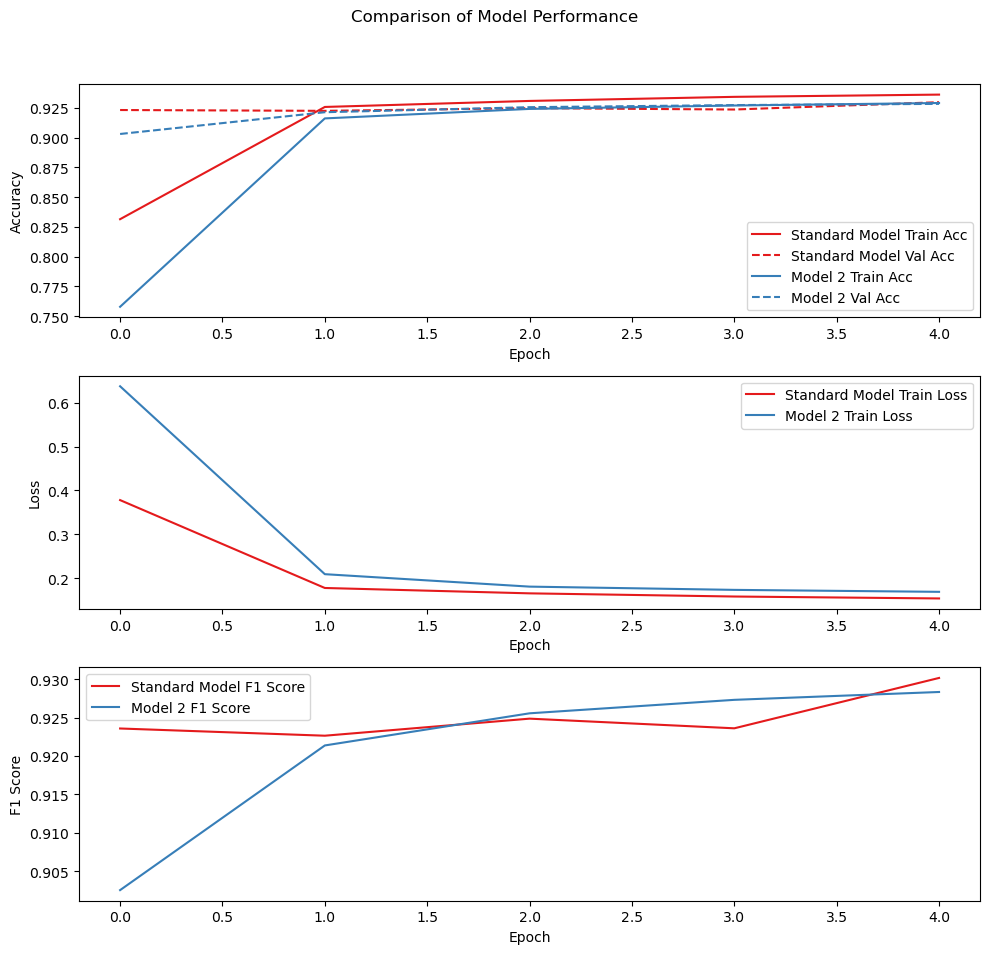

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Define a color map
cm = plt.get_cmap('Set1')

# Set up the figure and axes
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
fig.suptitle('Comparison of Model Performance')

# Plot Training and Validation Accuracy
axes[0].plot(history_standard.history['accuracy'],
             label="Standard Model Train Acc", color=cm(0))
axes[0].plot(history_standard.history['val_accuracy'],
             label="Standard Model Val Acc", color=cm(0), linestyle='--')
axes[0].plot(models[1].history.history['accuracy'],
             label="Model 2 Train Acc", color=cm(1))
axes[0].plot(models[1].history.history['val_accuracy'],
             label="Model 2 Val Acc", color=cm(1), linestyle='--')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

# Plot Training and Validation Loss
axes[1].plot(history_standard.history['loss'],
             label="Standard Model Train Loss", color=cm(0))
axes[1].plot(models[1].history.history['loss'],
             label="Model 2 Train Loss", color=cm(1))
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

# Plot F1 Score if available
if 'val_F1Score' in history_standard.history and 'val_F1Score' in models[1].history.history:
    f1_score_standard = np.array(history_standard.history['val_F1Score'])
    f1_mean_standard_model = np.mean(
        f1_score_standard, axis=1) if f1_score_standard.ndim > 1 else f1_score_standard
    axes[2].plot(f1_mean_standard_model,
                 label="Standard Model F1 Score", color=cm(0))

    f1_score_model2 = np.array(models[1].history.history['val_F1Score'])
    model2_f1_mean = np.mean(
        f1_score_model2, axis=1) if f1_score_model2.ndim > 1 else f1_score_model2
    axes[2].plot(model2_f1_mean, label="Model 2 F1 Score", color=cm(1))
    axes[2].set_xlabel('Epoch')
    axes[2].set_ylabel('F1 Score')
    axes[2].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- The accuracy of the models are very close. While the deep and wide model that includes a combination of wide and deep branche has a hight F1 Score and lower loss function.
Overall, the performance of the deep and wide model have better performance than a standard Multi-Layer Perceptron (MLP) model.
- The higher F1 score and lower loss of model 2, the deep and wide model, suggest that it is better at balancing precision and recall, and generally making more accurate predictions with less error. This is indicative of better overall model performance, especially in imbalanced datasets.
- The wide component of the deep and wide model might be capturing beneficial interactions between features that the MLP isn't able to, due to its purely deep structure. This could contribute to its superior performance.
- The structure of deep and wide models helps in generalizing better on unseen data while also effectively memorizing large-scale sparse feature interactions. This is crucial for robust performance across diverse datasets.


##### compare using the receiver operating characteristic and area under the curve
- Calculating the F1-score alongside the ROC and AUC metrics

In [86]:
from tensorflow import keras
from sklearn.metrics import roc_curve, auc, roc_auc_score, f1_score
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [83]:
def plot_multiclass_roc_auc(model, X_test, Y_test, n_classes, plot_title='Multi-class ROC Curve'):
    # Predict class probabilities
    y_prob = model.predict(X_test)
    # Convert probabilities to predicted class labels
    y_pred = np.argmax(y_prob, axis=1)

    # Prepare binary class matrices for each class
    from sklearn.preprocessing import label_binarize
    y_test_dummies = label_binarize(
        Y_test, classes=[j for j in range(n_classes)])

    # Compute ROC curve and ROC area for each class
    fpr = {}
    tpr = {}
    roc_auc = {}
    f1_scores = {}
    classes = range(n_classes)  # Define 'classes' variable here
    for i in classes:
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        # Compute F1-score for each class
        f1_scores[i] = f1_score(y_test_dummies[:, i], y_pred == i)

    # Plot ROC curve for each class
    plt.figure(figsize=(10, 8))
    for i in classes:
        plt.plot(fpr[i], tpr[i], linestyle='-',
                 label='Class %d (area = %0.2f)' % (i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(np.mean([f1_scores[i] for i in classes]),
             'ro', label='Average F1 Score')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(plot_title)
    plt.legend(loc="lower right")
    plt.show()

    # Plot F1-scores for each class
    plt.figure(figsize=(10, 8))
    plt.bar(classes, [f1_scores[i] for i in classes], color='skyblue')
    plt.xlabel('Class')
    plt.ylabel('F1 Score')
    plt.title('F1 Scores by Class')
    plt.xticks(classes)
    plt.show()

    # Calculate and print the average AUC
    avg_auc = np.mean([roc_auc[i] for i in classes])
    print("Average AUC:", avg_auc)

    # Calculate and print the average F1-score
    avg_f1_score = np.mean([f1_scores[i] for i in classes])
    print("Average F1 Score:", avg_f1_score)

    return avg_auc, avg_f1_score

##### Integrate the ROC and AUC Calculation in the Evaluation

22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step


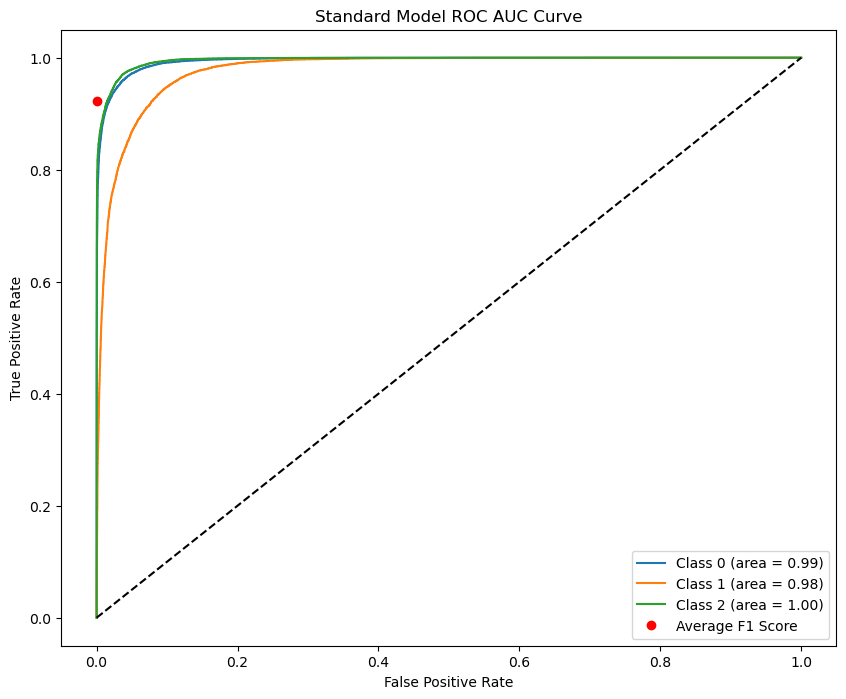

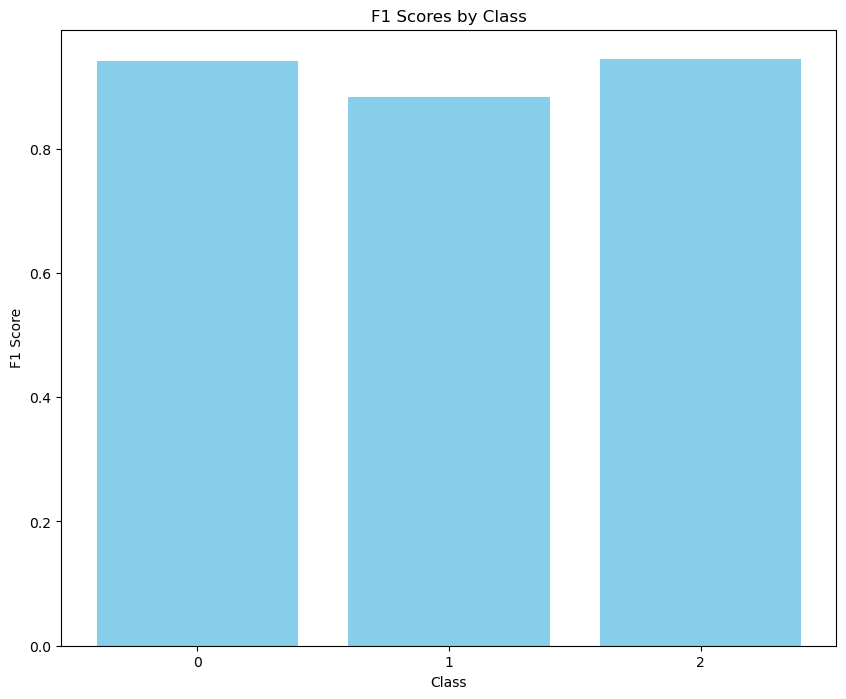

Average AUC: 0.9894048918403658
Average F1 Score: 0.9234075428291245


(0.9894048918403658, 0.9234075428291245)

In [84]:
X_test = preprocessed_ds_test.map(lambda x, y: x)
Y_test = preprocessed_ds_test.map(lambda x, y: y)
Y_test = np.concatenate([y for y in Y_test], axis=0)

# Assuming your Y_test is already one-hot encoded, if not, use to_categorical
if Y_test.shape[-1] != num_classes:
    Y_test = to_categorical(Y_test, num_classes=num_classes)

# Evaluate the model and plot ROC AUC
plot_multiclass_roc_auc(standard_model, X_test, Y_test, num_classes, plot_title='Standard Model ROC AUC Curve')

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


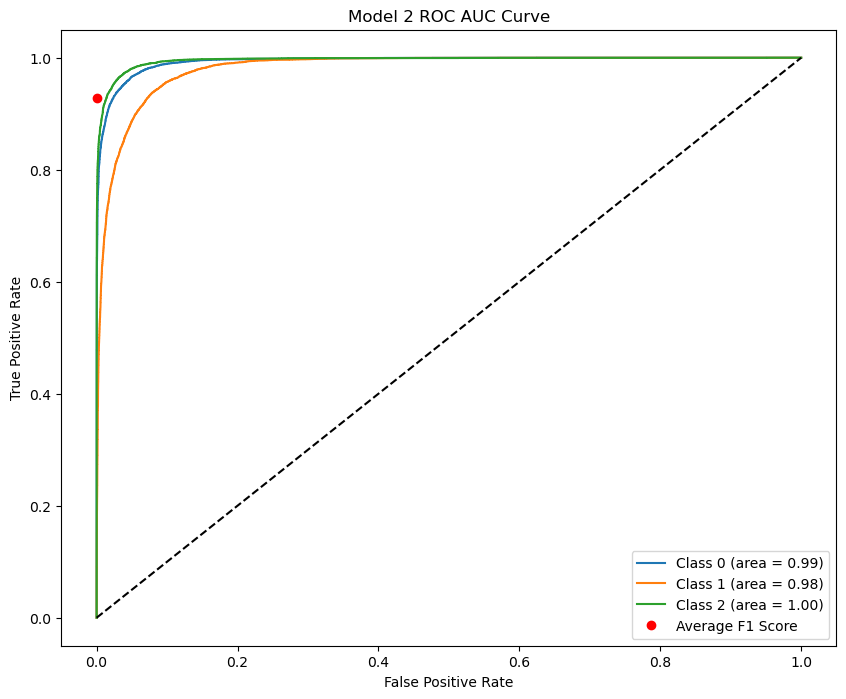

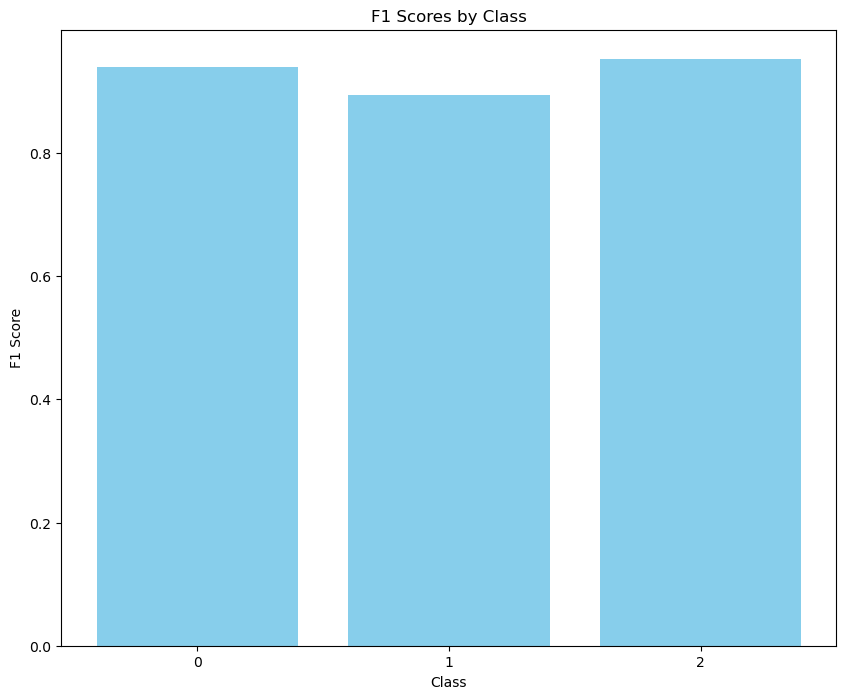

Average AUC: 0.99003333439012
Average F1 Score: 0.9289475913352915


(0.99003333439012, 0.9289475913352915)

In [92]:
# Get model 2 training and validation data

from keras.utils import FeatureSpace
df_train, df_test = train_test_split(data, test_size=0.2)
batch_size = 2048


def create_dataset_from_dataframe(df_input):

    labels = df_input['Price']
    df = df_input.copy().drop(columns=['Price'])

    df = {key: value.values[:, np.newaxis] for key, value in df.items()}

    # create a tf.data.Dataset object
    ds = tf.data.Dataset.from_tensor_slices((dict(df), to_categorical(labels)))
    # ds = tf.data.Dataset.from_tensor_slices((dict(df), (labels)))

    # enable batching and prefetching
    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)

    return ds

ds_train = create_dataset_from_dataframe(df_train)
ds_test = create_dataset_from_dataframe(df_test)

feature_space = FeatureSpace(
    features={
        # Categorical feature encoded as string
        "Maker": FeatureSpace.string_categorical(num_oov_indices=16),
        "Genmodel": FeatureSpace.string_categorical(num_oov_indices=32),
        "Color": FeatureSpace.string_categorical(num_oov_indices=0),
        "Bodytype": FeatureSpace.string_categorical(num_oov_indices=0),
        "Gearbox": FeatureSpace.string_categorical(num_oov_indices=0),
        "Fuel_type": FeatureSpace.string_categorical(num_oov_indices=0),

        # Numerical features to make discrete, make into integer with max val
        "Adv_year": FeatureSpace.float_discretized(num_bins=10),
        "Adv_month": FeatureSpace.float_discretized(num_bins=12),
        "Reg_year": FeatureSpace.float_discretized(num_bins=10),
        "Seat_num": FeatureSpace.float_discretized(num_bins=10),
        "Door_num": FeatureSpace.float_discretized(num_bins=10),

        # Numerical features to normalize (normalization will be learned)
        # learns the mean, variance, and if to invert (3 parameters)
        "Runned_Miles": FeatureSpace.float_normalized(),
        "Engin_size": FeatureSpace.float_normalized(),
        "Engine_power": FeatureSpace.float_normalized(),
        "Wheelbase": FeatureSpace.float_normalized(),
        "Height": FeatureSpace.float_normalized(),
        "Width": FeatureSpace.float_normalized(),
        "Length": FeatureSpace.float_normalized(),
        "Average_mpg": FeatureSpace.float_normalized(),
        "Top_speed": FeatureSpace.float_normalized(),
    },
    # Specify feature cross with a custom crossing dim
    crosses=[
        FeatureSpace.cross(feature_names=(
            'Maker', 'Bodytype'), crossing_dim=60 * 14),
        FeatureSpace.cross(feature_names=(
            'Fuel_type', 'Gearbox'), crossing_dim=2 * 8),
        FeatureSpace.cross(feature_names=(
            'Color', 'Bodytype'), crossing_dim=22 * 14),
    ],
    output_mode="concat",  # can also be a dict, processed internally
)


# Run on the data
# create a version of the dataset that can be iterated without labels
train_ds_with_no_labels = ds_train.map(lambda x, _: x)
# the adapt function allows the model to learn one-hot encoding sizes
# inititalize the feature map to this data
feature_space.adapt(train_ds_with_no_labels)


# now define a preprocessing operation that returns the processed features
preprocessed_ds_train = ds_train.map(lambda x, y: (feature_space(x), y),
                                     num_parallel_calls=tf.data.AUTOTUNE)
# run it so that we can use the pre-processed data
preprocessed_ds_train = preprocessed_ds_train.prefetch(tf.data.AUTOTUNE)

# Run on the test set
preprocessed_ds_test_wide_deep_model = ds_test.map(lambda x, y: (
    feature_space(x), y), num_parallel_calls=tf.data.AUTOTUNE)
preprocessed_ds_test_wide_deep_model = preprocessed_ds_test.prefetch(tf.data.AUTOTUNE)


# Final data preparation
X_test = preprocessed_ds_test_wide_deep_model.map(lambda x, y: x)
Y_test = preprocessed_ds_test_wide_deep_model.map(lambda x, y: y)
Y_test = np.concatenate([y for y in Y_test], axis=0)

# Assuming your Y_test is already one-hot encoded, if not, use to_categorical
if Y_test.shape[-1] != num_classes:
    Y_test = to_categorical(Y_test, num_classes=num_classes)
    
plot_multiclass_roc_auc(models[1], X_test, Y_test, num_classes, plot_title='Model 2 ROC AUC Curve')

##### Standard MLP:
- Average AUC: 0.9894048918403658
- Average F1 Score: 0.9234075428291245

#####  Wide and Deep Model - Model 2
- Average AUC: 0.99003333439012
- Average F1 Score: 0.9289475913352915

##### Conclusion:
- It plots the True Positive Rate (TPR, also known as sensitivity or recall) against the False Positive Rate (FPR, 1 - specificity) at various threshold settings.
- The Average AUC is calculated as the mean of the AUC values for all classes. This gives a single measure of how well the model discriminates between any randomly chosen pair from different classes.
- A higher AUC value indicates a better performing model in terms of its ability to distinguish between the positive and negative classes.

It demonstrates that the Wide and Deep Model, which combines wide branches and deep branches, performed better. In real-world applications such as Google's recommendation systems, the Wide and Deep Model has shown significant improvements in click-through rates by effectively combining the strengths of memorization and generalization. This makes it suitable for complex tasks where both the specific interactions of features and the subtle patterns hidden in large data volumes are crucial for making predictions.


# 3. Exceptional Work 
- Capture the embedding weights from the deep network
- If needed, perform dimensionality reduction on the output of these embedding layers (only if needed). That is, pass the observations into the network, save the embedded weights (called embeddings), and then perform  dimensionality reduction in order to visualize results.
- Visualize and explain any clusters in the data.


Build a training model using embedding branches

In [31]:
from keras.utils import FeatureSpace

# Create a tensorflow dataset, for ease of use later
df_train, df_test = train_test_split(data, test_size=0.2)
batch_size = 1024

def create_dataset_from_dataframe(df_input):
    labels = df_input['Price']
    df = df_input.copy().drop(columns=['Price'])  

    df = {key: value.values[:, np.newaxis] for key, value in df.items()}
    
    # create a tf.data.Dataset object
    ds = tf.data.Dataset.from_tensor_slices((dict(df), to_categorical(labels)))
 
    # enable batching and prefetching
    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)

    return ds

ds_train = create_dataset_from_dataframe(df_train)
ds_test = create_dataset_from_dataframe(df_test)

In [33]:
from tensorflow.keras.utils import FeatureSpace

crossing_dim1 = len(df_train['Maker'].unique()) * len(df_train['Bodytype'].unique())
crossing_dim2 = len(df_train['Fuel_type'].unique()) * len(df_train['Gearbox'].unique())
crossing_dim3 = len(df_train['Color'].unique()) * len(df_train['Bodytype'].unique())

feature_space = FeatureSpace(
    features={
        # Categorical feature encoded as string
        "Maker": FeatureSpace.string_categorical(num_oov_indices=16),
        "Genmodel": FeatureSpace.string_categorical(num_oov_indices=32),
        "Color": FeatureSpace.string_categorical(num_oov_indices=0),
        "Bodytype": FeatureSpace.string_categorical(num_oov_indices=0),
        "Gearbox": FeatureSpace.string_categorical(num_oov_indices=0),
        "Fuel_type": FeatureSpace.string_categorical(num_oov_indices=0),

        # Numerical features to make discrete, make into integer with max val
        "Adv_year": FeatureSpace.float_discretized(num_bins=10),
        "Adv_month": FeatureSpace.float_discretized(num_bins=12),
        "Reg_year": FeatureSpace.float_discretized(num_bins=10),
        "Seat_num": FeatureSpace.float_discretized(num_bins=10),
        "Door_num": FeatureSpace.float_discretized(num_bins=10),

        # Numerical features to normalize (normalization will be learned)
        # learns the mean, variance, and if to invert (3 parameters)
        "Runned_Miles": FeatureSpace.float_normalized(),
        "Engin_size": FeatureSpace.float_normalized(),
        "Engine_power": FeatureSpace.float_normalized(),
        "Wheelbase": FeatureSpace.float_normalized(),
        "Height": FeatureSpace.float_normalized(),
        "Width": FeatureSpace.float_normalized(),
        "Length": FeatureSpace.float_normalized(),
        "Average_mpg": FeatureSpace.float_normalized(),
        "Top_speed": FeatureSpace.float_normalized(),
    },
    # Specify feature cross with a custom crossing dim
    crosses=[
        FeatureSpace.cross(feature_names=('Maker', 'Bodytype'), crossing_dim=crossing_dim1, output_mode='int'),
        FeatureSpace.cross(feature_names=('Fuel_type', 'Gearbox'), crossing_dim=crossing_dim2, output_mode='int'),
        FeatureSpace.cross(feature_names=('Color', 'Bodytype'), crossing_dim=crossing_dim3, output_mode='int'),
    ],
    output_mode="dict",  # can also be a dict, processed internally
)

#run on the data
train_ds_with_no_labels = ds_train.map(lambda x, _: x)
feature_space.adapt(train_ds_with_no_labels)


# now define a preprocessing operation that returns the processed features
preprocessed_ds_train = ds_train.map(lambda x, y: (feature_space(x), y),
                                     num_parallel_calls=tf.data.AUTOTUNE)

preprocessed_ds_train = preprocessed_ds_train.prefetch(tf.data.AUTOTUNE)

# Run on the test set
preprocessed_ds_test = ds_test.map(lambda x, y: (feature_space(x), y), num_parallel_calls=tf.data.AUTOTUNE)
preprocessed_ds_test = preprocessed_ds_test.prefetch(tf.data.AUTOTUNE)

In [36]:
import warnings
num_classes = 3
num_epoch = 5
verbose = 1
warnings.filterwarnings('ignore', category=UserWarning)

cat_features = ['Maker', 'Genmodel', 'Color',
                'Bodytype', 'Gearbox', 'Fuel_type']


# Scale continuous numeric values
num_features = ['Adv_year', 'Adv_month', 'Reg_year', 'Seat_num', 'Door_num', 'Runned_Miles', 'Engin_size', 'Engine_power',
                'Wheelbase', 'Height', 'Width', 'Length', 'Average_mpg', 'Top_speed']


def setup_embedding_from_encoding(encoded_features, col_name):
    # what the maximum integer value for this variable?

    # get the size of the feature
    x = encoded_features[col_name]
    N = x.shape[1]

    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N,
                  output_dim=int(np.sqrt(N)),
                  input_length=1, name=col_name+'_embed')(x)

    x = Flatten()(x)  # get rid of that pesky extra dimension (for time of embedding)

    return x


dict_inputs = feature_space.get_inputs()
encoded_features = feature_space.get_encoded_features()

# we need to create separate lists for each branch
crossed_outputs = []

# for each crossed variable, make an embedding
for col in feature_space.crossers.keys():

    x = setup_embedding_from_encoding(encoded_features, col)

    # save these outputs in list to concatenate later
    crossed_outputs.append(x)


# now concatenate the outputs and add a fully connected layer
wide_branch = Concatenate(name='wide_concat')(crossed_outputs)

# reset this input branch
all_deep_branch_outputs = []

# for each numeric variable, just add it in after embedding
for col in num_features:
    x = encoded_features[col]
    # x = tf.cast(x,float) # cast an integer as a float here
    all_deep_branch_outputs.append(x)

# for each categorical variable
for col in cat_features:

    # get the output tensor from ebedding layer
    x = setup_embedding_from_encoding(encoded_features, col)

    # save these outputs in list to concatenate later
    all_deep_branch_outputs.append(x)


# merge the deep branches together
deep_branch = Concatenate(name='embed_concat')(all_deep_branch_outputs)
deep_branch = Dense(units=50, activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=25, activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10, activation='relu', name='deep3')(deep_branch)

# merge the deep and wide branch
final_branch = Concatenate(name='concat_deep_wide')([deep_branch, wide_branch])
final_branch = Dense(units=num_classes, activation='softmax',
                     name='combined')(final_branch)

# encoded features input, fast
training_model = keras.Model(inputs=encoded_features, outputs=final_branch)
training_model.compile(
    optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy", "F1Score"]
)

training_model.summary()



Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ keras_tensor_200CL… │ (None, 76)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_199CL… │ (None, 724)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_195CL… │ (None, 22)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_194CL… │ (None, 14)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_198CL… │ (None, 2)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_197CL… │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Maker_embed         │ (None, 76, 8)     │        608 │ keras_tensor_200… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Genmodel_embed      │ (None, 724, 26)   │     18,824 │ keras_tensor_199… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Color_embed         │ (None, 22, 4)     │         88 │ keras_tensor_195… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Bodytype_embed      │ (None, 14, 3)     │         42 │ keras_tensor_194… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Gearbox_embed       │ (None, 2, 1)      │          2 │ keras_tensor_198… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Fuel_type_embed     │ (None, 8, 2)      │         16 │ keras_tensor_197… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_193CL… │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_192CL… │ (None, 12)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_201CL… │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_202CL… │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ keras_tensor_196CL… │ (None, 10)        │          0 │ -               

 Total params: 1,003,260 (3.83 MB)

 Trainable params: 1,003,260 (3.83 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Train the model
history= training_model.fit(
    preprocessed_ds_train, validation_data=preprocessed_ds_test, epochs=num_epoch, verbose=verbose)

Epoch 1/5
169/169 ━━━━━━━━━━━━━━━━━━━━ 25s 114ms/step - F1Score: 0.5882 - accuracy: 0.5944 - loss: 0.8601 - val_F1Score: 0.8735 - val_accuracy: 0.8724 - val_loss: 0.3208
Epoch 2/5
169/169 ━━━━━━━━━━━━━━━━━━━━ 19s 113ms/step - F1Score: 0.8929 - accuracy: 0.8926 - loss: 0.2732 - val_F1Score: 0.9103 - val_accuracy: 0.9103 - val_loss: 0.2177
Epoch 3/5
169/169 ━━━━━━━━━━━━━━━━━━━━ 21s 115ms/step - F1Score: 0.9108 - accuracy: 0.9106 - loss: 0.2122 - val_F1Score: 0.9160 - val_accuracy: 0.9158 - val_loss: 0.2046
Epoch 4/5
169/169 ━━━━━━━━━━━━━━━━━━━━ 20s 117ms/step - F1Score: 0.9155 - accuracy: 0.9154 - loss: 0.1996 - val_F1Score: 0.9146 - val_accuracy: 0.9143 - val_loss: 0.2025
Epoch 5/5
169/169 ━━━━━━━━━━━━━━━━━━━━ 20s 118ms/step - F1Score: 0.9193 - accuracy: 0.9192 - loss: 0.1917 - val_F1Score: 0.9206 - val_accuracy: 0.9207 - val_loss: 0.1930


In [38]:
# Print all the layer names to check if the model has been trained and the layers have weights
print("Has the model been trained?", hasattr(training_model, 'history'))
print("\n")
for layer in training_model.layers:
    print(layer.name, 'has weights', bool(layer.get_weights()))


Has the model been trained? True


keras_tensor_200CLONE has weights False
keras_tensor_199CLONE has weights False
keras_tensor_195CLONE has weights False
keras_tensor_194CLONE has weights False
keras_tensor_198CLONE has weights False
keras_tensor_197CLONE has weights False
Maker_embed has weights True
Genmodel_embed has weights True
Color_embed has weights True
Bodytype_embed has weights True
Gearbox_embed has weights True
Fuel_type_embed has weights True
keras_tensor_193CLONE has weights False
keras_tensor_192CLONE has weights False
keras_tensor_201CLONE has weights False
keras_tensor_202CLONE has weights False
keras_tensor_196CLONE has weights False
keras_tensor_180CLONE has weights False
keras_tensor_181CLONE has weights False
keras_tensor_182CLONE has weights False
keras_tensor_183CLONE has weights False
keras_tensor_184CLONE has weights False
keras_tensor_185CLONE has weights False
keras_tensor_186CLONE has weights False
keras_tensor_187CLONE has weights False
keras_tensor_188CLO

In [39]:
# Retieve the embeddings layers
import numpy as np
embed_layers = [
    layer for layer in training_model.layers if 'embed' in layer.name]

# Extract their weights
embed_weights = { }
for layer in embed_layers:
    weights = layer.get_weights()
    if weights: # if there are weights
        embed_weights[layer.name] = weights[0] 
        
# # # save the weights
# for name, weights in embed_weights.items():
#     np.save(f'{name}_weights.npy', weights)

# print out the weights
for name, weights in embed_weights.items():
    print(f'{name}: {weights.shape}')

Maker_embed: (76, 8)
Genmodel_embed: (724, 26)
Color_embed: (22, 4)
Bodytype_embed: (14, 3)
Gearbox_embed: (2, 1)
Fuel_type_embed: (8, 2)
Maker_X_Bodytype_embed: (1, 1)
Fuel_type_X_Gearbox_embed: (1, 1)
Color_X_Bodytype_embed: (1, 1)


Based on the details from above the outputs about the embedding weights and the layers of the model, here is the analysis of the embeddings and some insights or steps might consider for future analysis and model improvement:

##### 1. Embedding Dimensions Review
 - Maker_embed: Dimension of 8 for 76 unique categories. This seems reasonable, allowing the model to learn a good representation of each maker.
 - Genmodel_embed: Dimension of 26 for 724 unique categories. Given the high number of unique categories, the dimensionality here also appears appropriate to capture the complexity.
 - Color_embed: Dimension of 4 for 22 unique colors. This is quite compact but could be sufficient if the color isn't a highly influential feature.
- Bodytype_embed: Dimension of 3 for 14 unique body types. Depending on the influence of body type on the price, you might consider increasing this if the performance isn't satisfactory.
- Gearbox_embed: Dimension of 1 for 2 categories. This is minimal but could be adequate given the binary nature (likely automatic vs manual).
- Fuel_type_embed: Dimension of 2 for 8 types. This is quite minimal and might need increasing if fuel type significantly influences the price.
- Maker_X_Bodytype_embed, Fuel_type_X_Gearbox_embed, Color_X_Bodytype_embed: All have a dimension of 1. These are very simplistic representations and might not capture interactions effectively unless these interactions are straightforward.

##### 2. Evaluate Embedding Efficacy
Visualizing Embeddings: 
- To better understand how these embeddings capture categorical information, consider visualizing them using dimensionality reduction techniques like PCA or t-SNE.



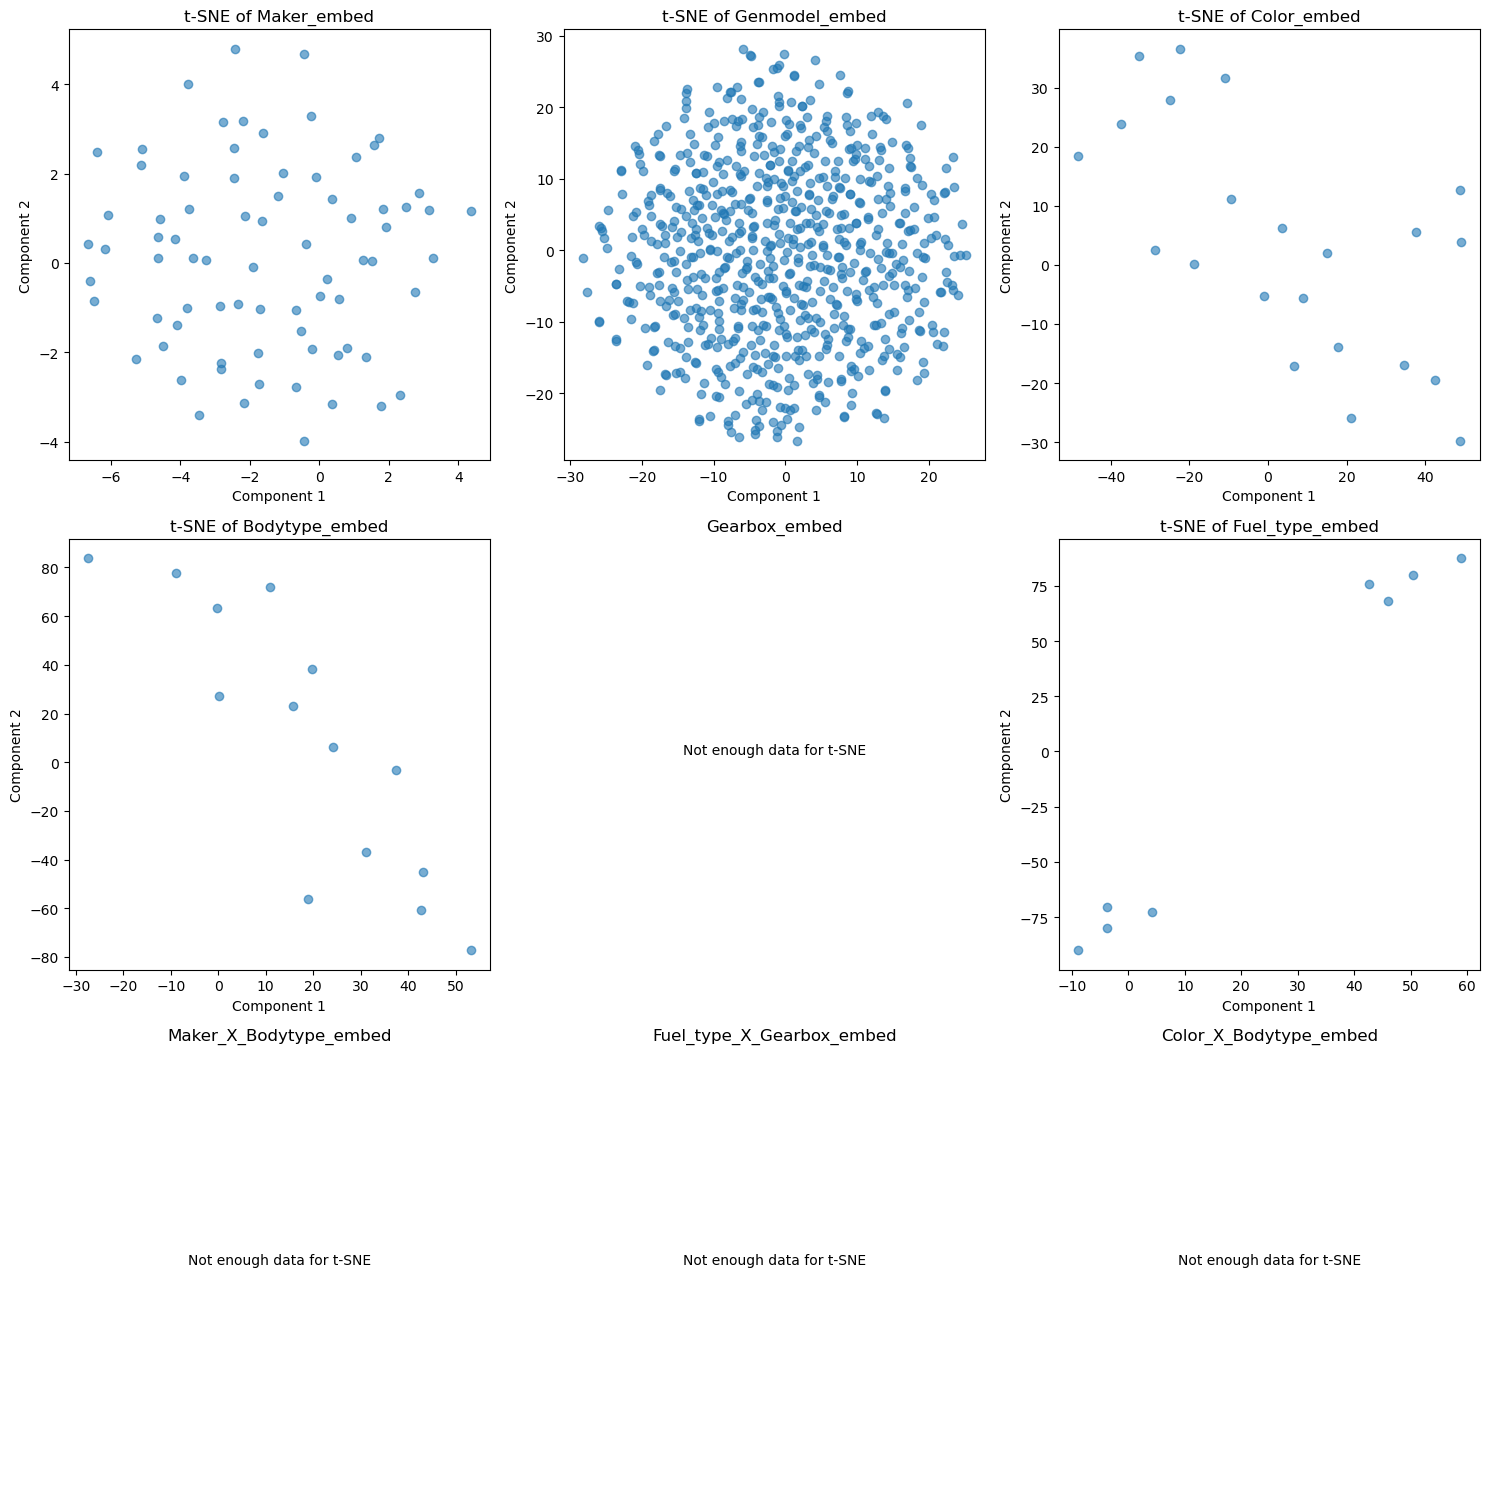

In [41]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.flatten()  # Flatten if you have a grid

# Iterate over embedding weights and apply t-SNE where feasible
for i, (name, weights) in enumerate(embed_weights.items()):
    if weights.shape[0] > 3:  # Ensure enough samples for t-SNE
        # Simply skip t-SNE for embedding layers where the number of embeddings is less than 3.
        perplexity_value = min(30, weights.shape[0] // 3)  # Example adjustment
        tsne = TSNE(n_components=2, perplexity=perplexity_value,
                    random_state=42)

        # Apply t-SNE to the embedding weights
        embeddings_tsne = tsne.fit_transform(weights)

        # Scatter plot of the result
        ax = axes[i]
        ax.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], alpha=0.6)
        ax.set_title(f't-SNE of {name}')
        ax.set_xlabel('Component 1')
        ax.set_ylabel('Component 2')
    else:
        # Not enough data points to run t-SNE, leave the subplot empty
        ax = axes[i]
        ax.text(0.5, 0.5, 'Not enough data for t-SNE',
                horizontalalignment='center')
        ax.set_title(f'{name}')
        ax.axis('off')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

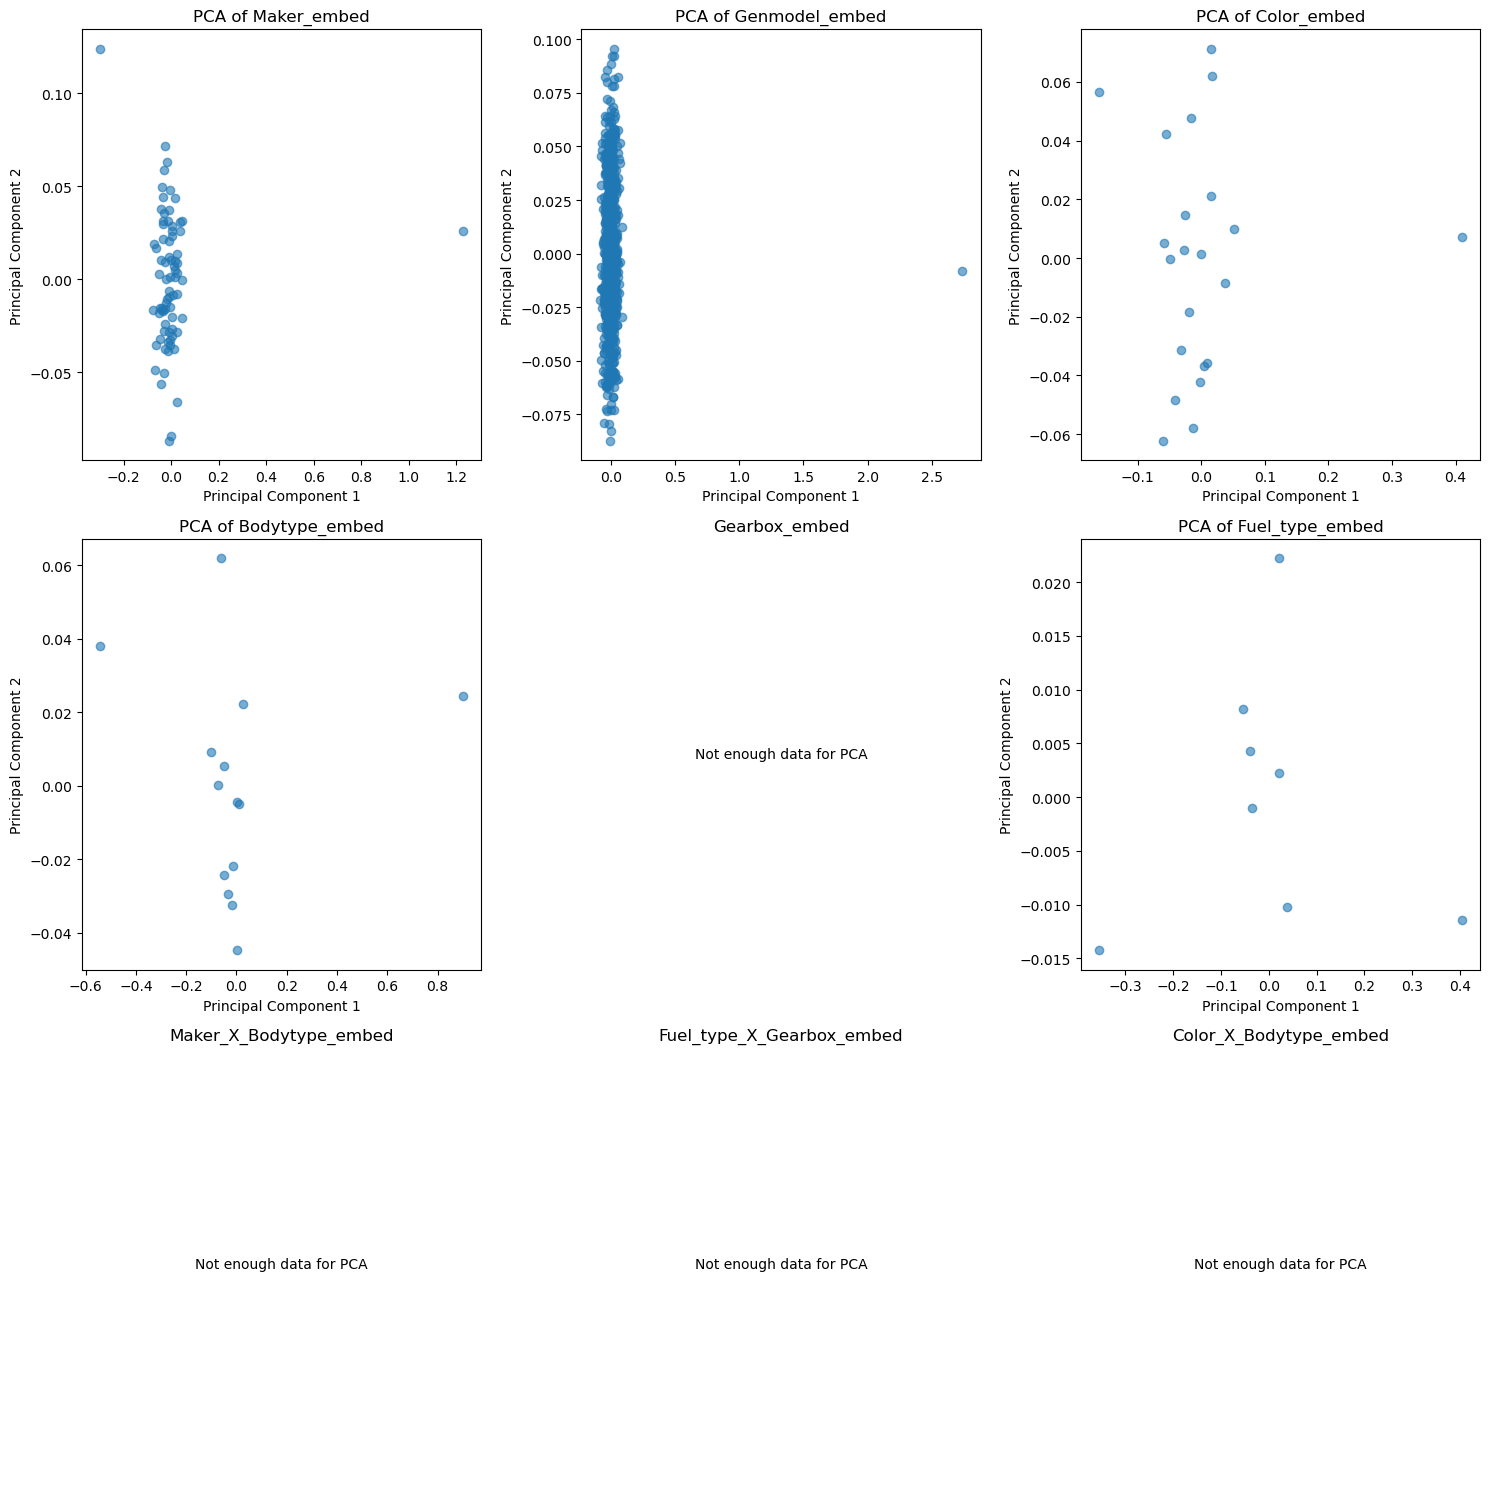

In [44]:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Initialize matplotlib figure
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
axes = axes.flatten()  # Flatten if you have a grid

# Iterate over embedding weights and apply PCA where feasible
for i, (name, weights) in enumerate(embed_weights.items()):
    # Check if there are enough samples and features
    if min(weights.shape) >= 2:
        # Proceed with PCA since we have at least 2 samples and features
        pca = PCA(n_components=2)  # Reduce to two components
        embeddings_pca = pca.fit_transform(weights)

        # Scatter plot of the result
        ax = axes[i]
        ax.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], alpha=0.6)
        ax.set_title(f'PCA of {name}')
        ax.set_xlabel('Principal Component 1')
        ax.set_ylabel('Principal Component 2')
    else:
        # Not enough data points to run PCA with 2 components
        ax = axes[i]
        ax.text(0.5, 0.5, 'Not enough data for PCA', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
        ax.set_title(f'{name}')
        ax.axis('off')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

##### 3. Refinement and Experimentation
- Adjust Dimensions: Based on the performance and the visualizations, it might be beneficial to adjust the embedding sizes. For embeddings that are too simplistic, increasing their dimension might capture more complex patterns.
- Crossed Features: The crossed feature embeddings are all set to a dimension of 1, which seems overly restrictive. Increasing these might help the model capture more complex interactions between these features.

##### 4. Advanced Techniques
- Regularization: If overfitting is observed, consider applying regularization techniques directly to the embeddings, such as L2 regularization.
- Learning Rate Variations: Experiment with different learning rates for different embeddings if certain features are more sensitive to initial training phases.

## References

1.) https://www.kaggle.com/datasets/mexwell/dvm-car/data

2.) https://keras.io/api/metrics/classification_metrics/#f1score-class